In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\bryan\Desktop\New_Data_Science_Class\DATA\mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df['Med_1_mL']

0      6.508231
1      4.126116
2      6.427870
3      3.672953
4      1.580321
         ...   
395    2.884122
396    7.290855
397    7.895325
398    2.690592
399    7.587821
Name: Med_1_mL, Length: 400, dtype: float64

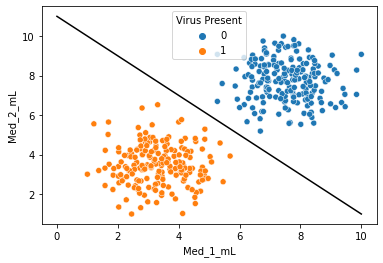

In [5]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',data=df, hue='Virus Present')

#hyperplane

x = np.linspace(0, 10,100)
m = -1
b = 11

y = m*x + b

plt.plot(x,y,'black')

In [6]:
from sklearn.svm import SVC

In [7]:
y = df['Virus Present']

In [8]:
X = df.drop('Virus Present',axis=1)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
model = SVC(kernel='linear',C=1000)

In [12]:
model.fit(X_train, y_train)

SVC(C=1000, kernel='linear')

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

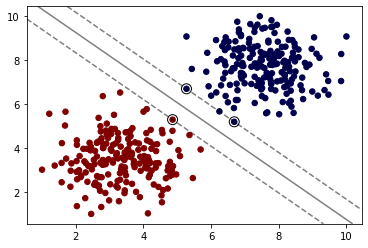

In [14]:
plot_svm_boundary(model,X,y)

In [15]:
model = SVC(kernel='linear',C=0.05)
model.fit(X, y)

SVC(C=0.05, kernel='linear')

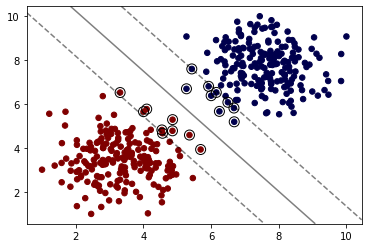

In [16]:
plot_svm_boundary(model, X, y )

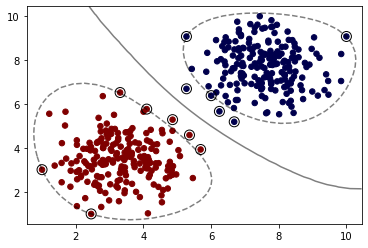

In [17]:
model = SVC(kernel='rbf',C=1, gamma='scale')
model.fit(X, y)
plot_svm_boundary(model, X, y)

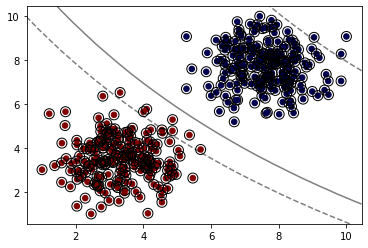

In [18]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model, X, y)

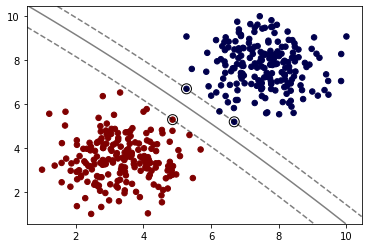

In [19]:
model = SVC(kernel='poly',degree=4)
model.fit(X, y)
plot_svm_boundary(model, X, y)

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
svm = SVC()
param_grid = {'C':[0.01, 0.1, 1],
              'kernel':['linear','rbf','poly']}

In [22]:
grid = GridSearchCV(svm, param_grid)

In [23]:
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [24]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [25]:
y_pred = grid.predict(X_test)

In [26]:
y_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [27]:
X_new = [[6,8]]

In [28]:
grid.predict(X_new)

array([0], dtype=int64)

In [29]:
X_new2 = [[4.126116,3.073459]]

In [30]:
grid.predict(X_new2)

array([1], dtype=int64)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
confusion_matrix(y_test,y_pred)

array([[62,  0],
       [ 0, 58]], dtype=int64)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        58

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [34]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [23]:
0.01

0.01